In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ms_df = pd.read_csv('/Users/manueltanguma/Downloads/Mass Shootings Dataset Ver 5 (1) including Parkland.csv', encoding='latin-1')

In [3]:
ms_df.shape

(324, 21)

In [4]:
ms_df.head(5)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,NaN,Stoneman Douglas High School shooting,"Parkland, Florida",02/14/2018,Stoneman Douglas High School,NaN,Students,anger,"Nikolas Cruz, 19, shot 17 students and wounded...",17,...,34,0.0,19,1.0,NaN,Yes,White,M,NaN,NaN
1,1.0,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
2,2.0,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
3,3.0,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
4,4.0,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132


In [5]:
ms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 21 columns):
S#                      323 non-null float64
Title                   324 non-null object
Location                279 non-null object
Date                    324 non-null object
Incident Area           262 non-null object
Open/Close Location     295 non-null object
Target                  319 non-null object
Cause                   247 non-null object
Summary                 324 non-null object
Fatalities              324 non-null int64
Injured                 324 non-null int64
Total victims           324 non-null int64
Policeman Killed        318 non-null float64
Age                     180 non-null object
Employeed (Y/N)         68 non-null float64
Employed at             41 non-null object
Mental Health Issues    324 non-null object
Race                    322 non-null object
Gender                  324 non-null object
Latitude                303 non-null float64
Longitude       

In [6]:
print(ms_df.describe())

               S#  Fatalities     Injured  Total victims  Policeman Killed  \
count  323.000000  324.000000  324.000000      324.00000        318.000000   
mean   162.000000    4.475309    6.209877       10.33642          0.128931   
std     93.386294    5.816280   29.848935       33.63602          0.609374   
min      1.000000    0.000000    0.000000        3.00000          0.000000   
25%     81.500000    1.000000    1.000000        4.00000          0.000000   
50%    162.000000    3.000000    3.000000        5.00000          0.000000   
75%    242.500000    6.000000    5.000000        9.00000          0.000000   
max    323.000000   59.000000  527.000000      585.00000          5.000000   

       Employeed (Y/N)    Latitude   Longitude  
count        68.000000  303.000000  303.000000  
mean          0.632353   37.225076  -94.429539  
std           0.485750    5.536365   16.513296  
min           0.000000   21.325512 -161.792752  
25%           0.000000   33.571459 -110.205485  
50%

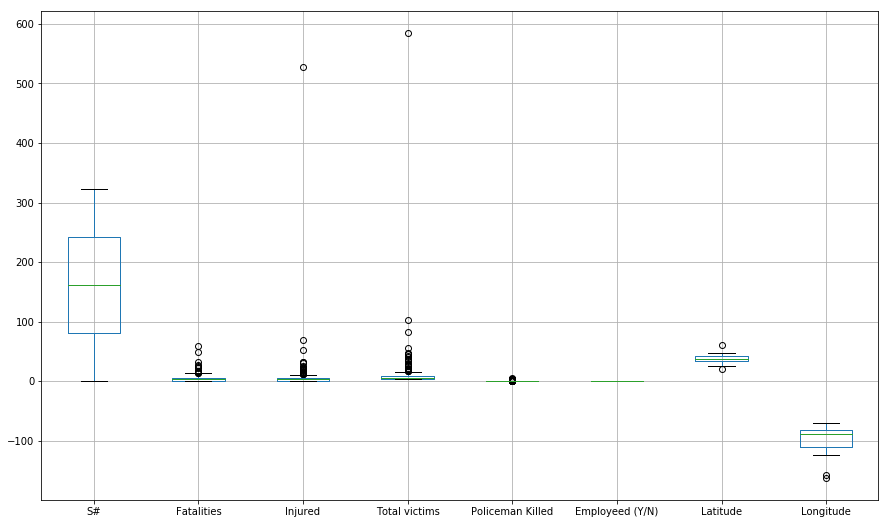

In [7]:
#Quick and dirty look at the data to check for outliers
plt.figure(figsize=(15,9))
ms_df.boxplot()

In [8]:
ms_df['Fatalities'].describe()

count    324.000000
mean       4.475309
std        5.816280
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       59.000000
Name: Fatalities, dtype: float64

In [9]:
ms_df['Injured'].describe()

count    324.000000
mean       6.209877
std       29.848935
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max      527.000000
Name: Injured, dtype: float64

In [10]:
ms_df['Total victims'].describe()

count    324.00000
mean      10.33642
std       33.63602
min        3.00000
25%        4.00000
50%        5.00000
75%        9.00000
max      585.00000
Name: Total victims, dtype: float64

In [11]:
ms_df['Age'].describe()

count     180
unique     51
top        44
freq        7
Name: Age, dtype: object

In [12]:
ms_df['Policeman Killed'].describe()

count    318.000000
mean       0.128931
std        0.609374
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: Policeman Killed, dtype: float64

In [13]:
#Seperating date into month and year specifically to work with
ms_df['Year'] = pd.DatetimeIndex(ms_df['Date']).year
ms_df['Month'] = pd.DatetimeIndex(ms_df['Date']).month

(-2, 60)

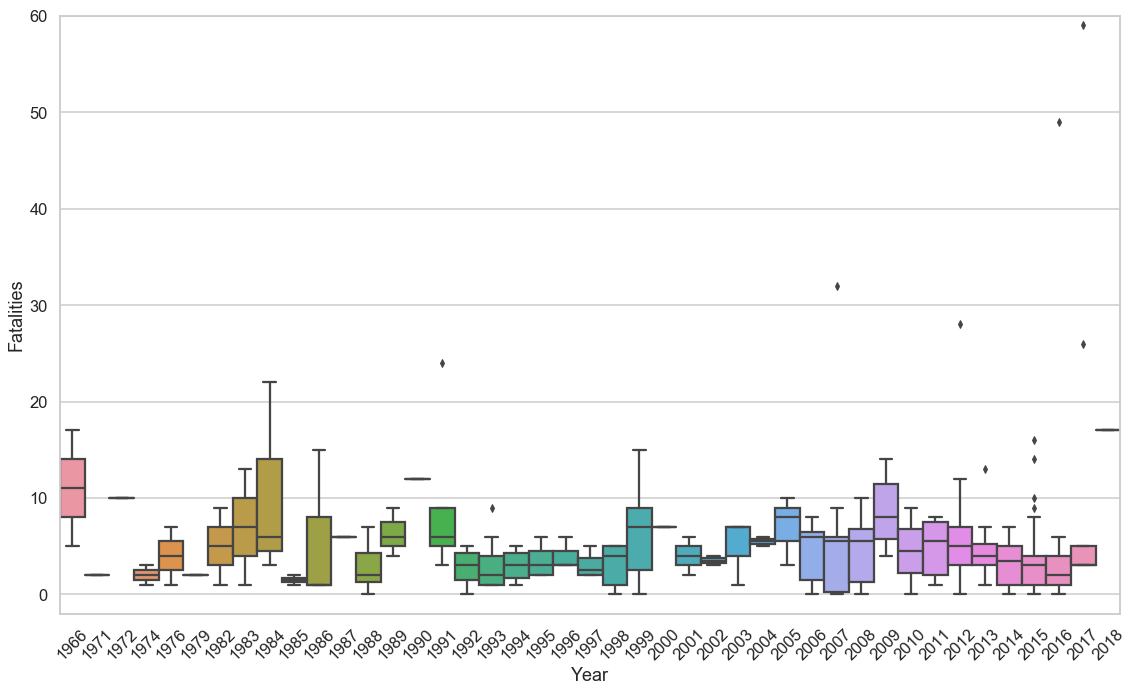

In [14]:
#Seaborn boxplot for Fatalities
plt.figure(figsize=(19,11))
sns.set(style="whitegrid")
sns.set_context("talk")
ax = sns.boxplot(x="Year", y="Fatalities", data=ms_df, width=1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.margins(y=0.10)
ax.set_ylim([-2, 60]) 

(-2, 60)

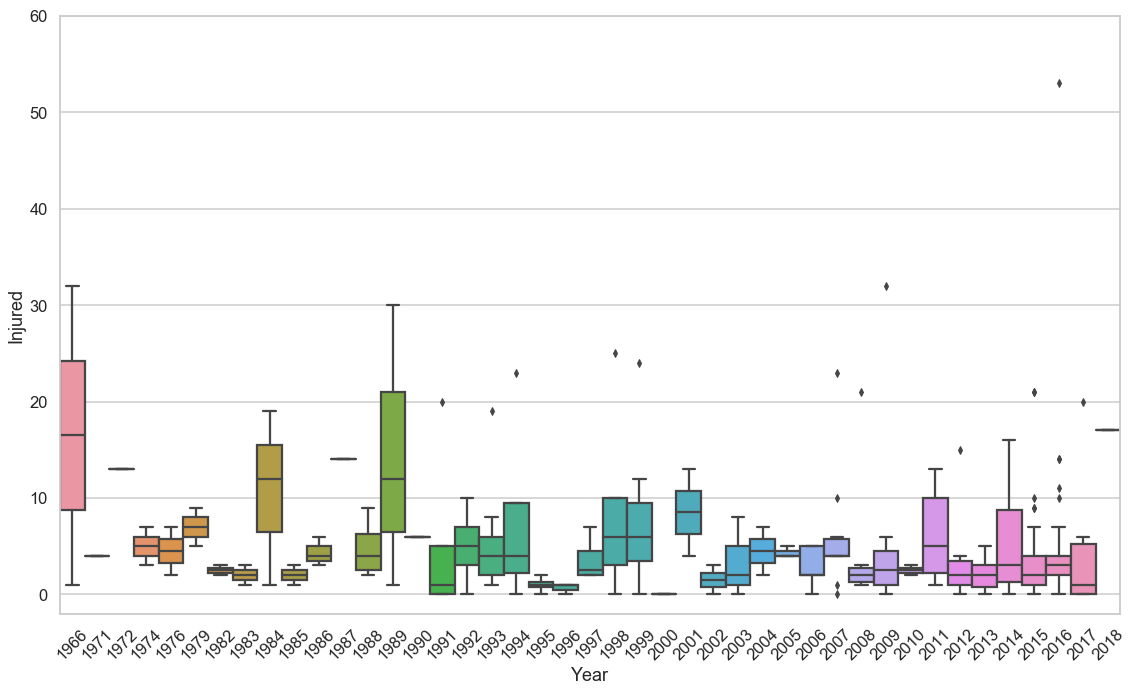

In [15]:
#Seaborn boxplot for Injured
plt.figure(figsize=(19,11))
sns.set(style="whitegrid")
sns.set_context("talk")
ax = sns.boxplot(x="Year", y="Injured", data=ms_df, width=1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.margins(y=0.10)
ax.set_ylim([-2, 60])

(-2, 60)

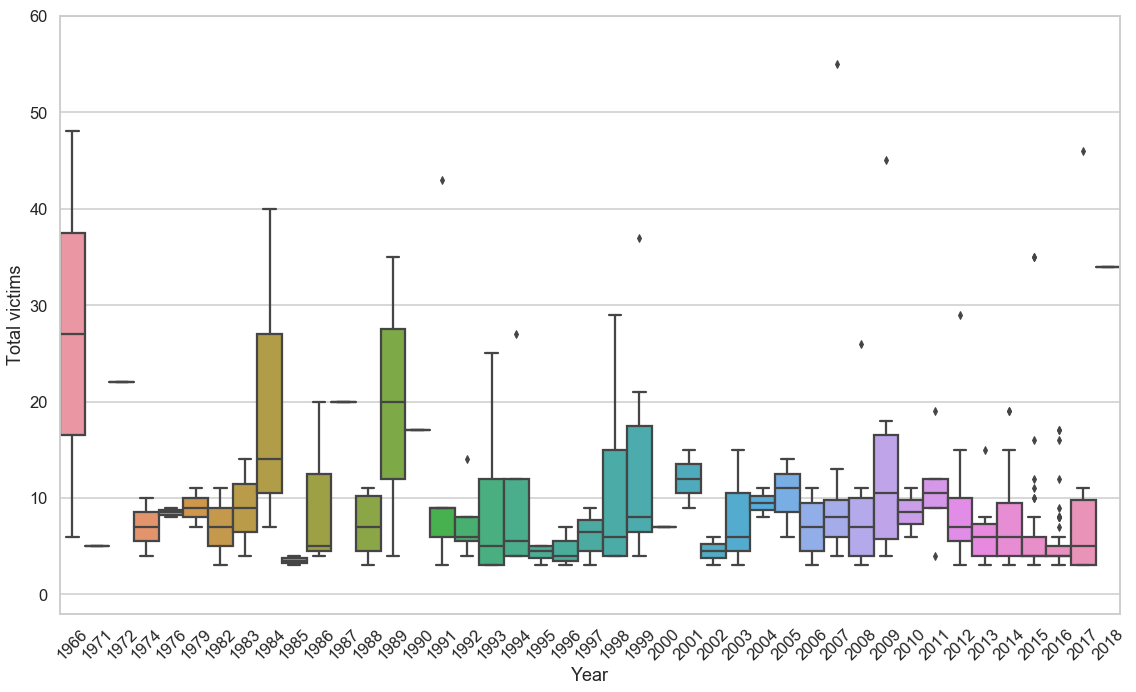

In [16]:
#Seaborn boxplot for Total Victims
plt.figure(figsize=(19,11))
sns.set(style="whitegrid")
sns.set_context("talk")
ax = sns.boxplot(x="Year", y="Total victims", data=ms_df, width=1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.margins(y=0.10)
ax.set_ylim([-2, 60])

In [17]:
#getting rid of comma seperated data in Age column
ms_df['Age'].replace(['17,18', '19,32', '19,22', '13,11', '15,16'], ['17.5', '25.5', '20.5', '12', '15.5'], inplace=True)

In [18]:
ms_df['Age'].value_counts()

14      7
18      7
34      7
19      7
44      7
43      6
40      6
15      6
45      6
17      6
39      6
41      6
20      6
37      6
36      5
22      5
28      5
42      5
23      5
29      5
24      5
16      4
25      4
26      4
35      3
59      3
32      3
27      3
47      3
55      2
38      2
64      2
12      2
48      2
30      2
52      2
57      2
13      1
15.5    1
0       1
21      1
31      1
70      1
50      1
51      1
33      1
25.5    1
20.5    1
66      1
17.5    1
Name: Age, dtype: int64

In [19]:
#Convert age to numeric age
ms_df["Age"] = pd.to_numeric(ms_df["Age"])

In [20]:
#getting the mean of the Age column to make that the NaN value
ms_df["Age"].mean()

31.66111111111111

In [21]:
#replacing NaN value in Age with the mean of 31.7
ms_df['Age'].fillna(31.7, inplace=True)

In [22]:
ms_df['Age'].value_counts()

31.7    144
14.0      7
34.0      7
44.0      7
18.0      7
19.0      7
17.0      6
43.0      6
20.0      6
15.0      6
37.0      6
39.0      6
41.0      6
45.0      6
40.0      6
36.0      5
23.0      5
28.0      5
24.0      5
29.0      5
42.0      5
22.0      5
16.0      4
26.0      4
25.0      4
35.0      3
27.0      3
59.0      3
32.0      3
47.0      3
57.0      2
38.0      2
64.0      2
55.0      2
12.0      2
30.0      2
52.0      2
48.0      2
21.0      1
15.5      1
0.0       1
51.0      1
70.0      1
25.5      1
20.5      1
31.0      1
50.0      1
66.0      1
13.0      1
17.5      1
33.0      1
Name: Age, dtype: int64

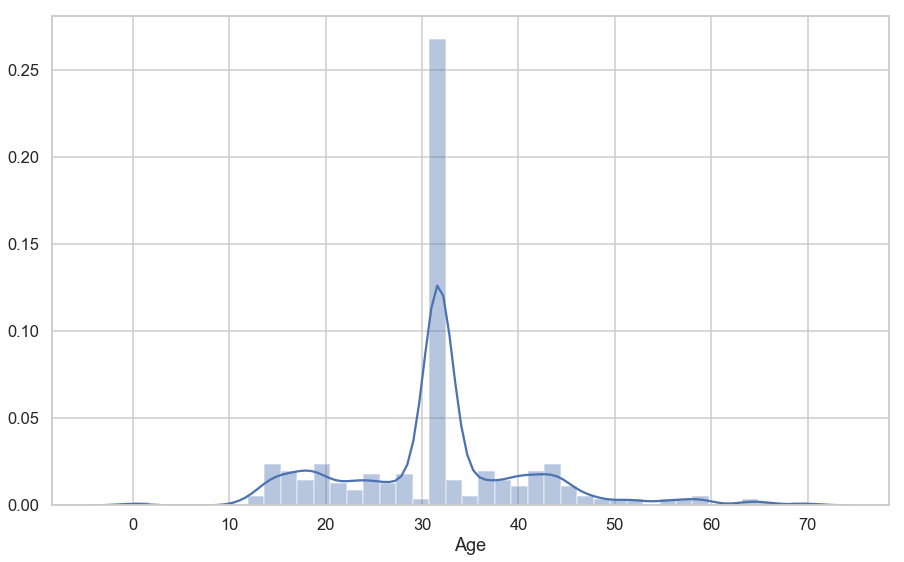

In [23]:
#distribution plot with NaN values replaced with mean of column
plt.figure(figsize=(15,9))
sns.set_context("talk")
sns.distplot(ms_df['Age'])

In [24]:
#Looking at Mental Health Issues column
ms_df['Mental Health Issues'].head(10)

0        Yes
1         No
2         No
3         No
4    Unclear
5        Yes
6    Unclear
7    Unclear
8        Yes
9    Unclear
Name: Mental Health Issues, dtype: object

In [25]:
ms_df['Mental Health Issues'].value_counts()

Unknown    110
Yes        107
No          93
Unclear     13
unknown      1
Name: Mental Health Issues, dtype: int64

In [26]:
#cleaning up Mental Health Issues column
list_ = ["Unknown", "Unclear", "Unknown","unknown"]

ms_df["Mental Health Issues"] = ms_df['Mental Health Issues'] = ['Unknown' if i in list_ else i for i in ms_df['Mental Health Issues']]

In [27]:
ms_df["Mental Health Issues"].value_counts()

Unknown    124
Yes        107
No          93
Name: Mental Health Issues, dtype: int64

In [28]:
#Creating temp file to work with to graph these three variables
temp_Mental_Health = ms_df[['Year', 'Mental Health Issues', 'Fatalities']]
temp_Mental_Health.head(5)

,Year,Mental Health Issues,Fatalities
0,2018,Yes,17
1,2017,No,26
2,2017,No,3
3,2017,No,3
4,2017,Unknown,59


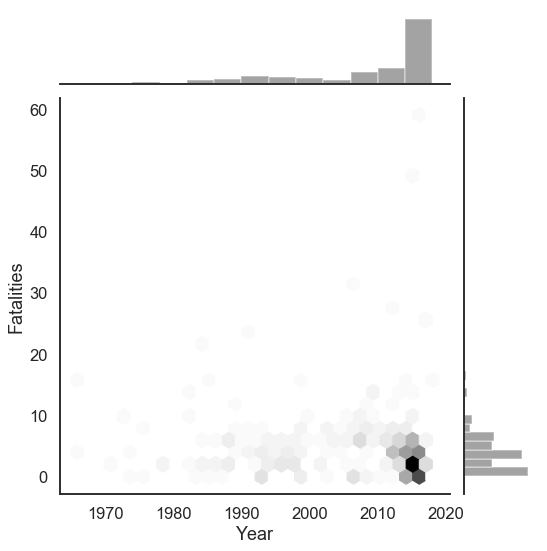

In [29]:
#Hexbin plot
with sns.axes_style("white"):
    sns.jointplot(x="Year", y="Fatalities", data=temp_Mental_Health, height=8, kind="hex", color="k");

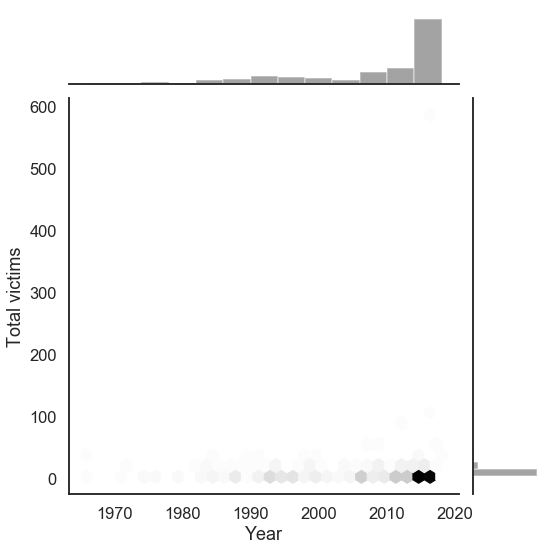

In [30]:
#Hexbin plot
with sns.axes_style("white"):
    sns.jointplot(x="Year", y="Total victims", data=ms_df, height=8, kind="hex", color="k");

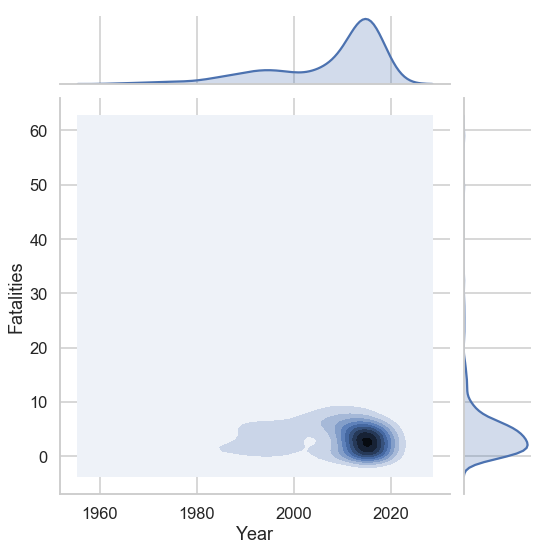

In [31]:
#KDE plot
sns.jointplot(x="Year", y="Fatalities", data=temp_Mental_Health, height=8, kind="kde")

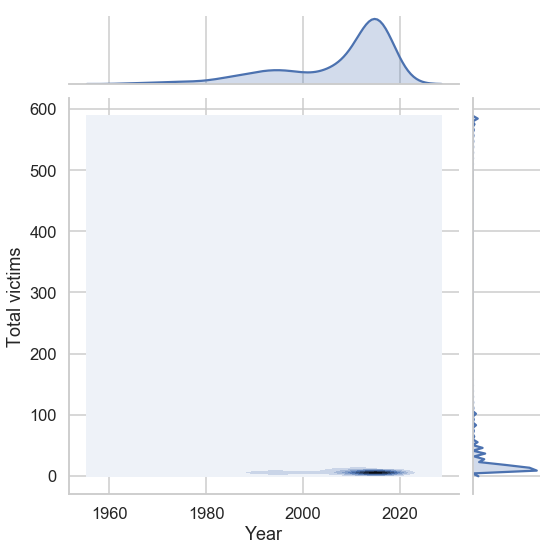

In [32]:
#KDE plot
sns.jointplot(x="Year", y="Total victims", data=ms_df, height=8, kind="kde")

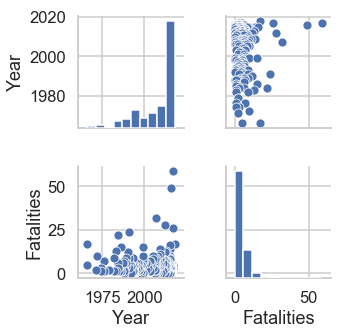

In [33]:

sns.pairplot(temp_Mental_Health)

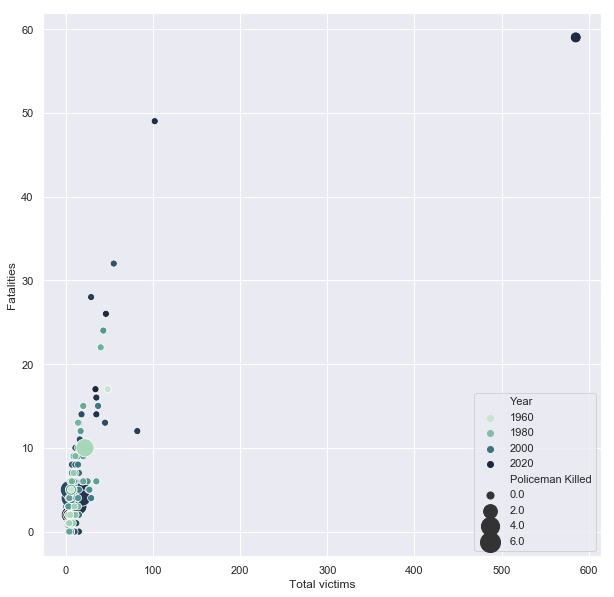

In [34]:

sns.set()


cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="Total victims", y="Fatalities",
                     hue="Year", size="Policeman Killed",
                     palette=cmap, sizes=(50, 400),
                     data=ms_df)

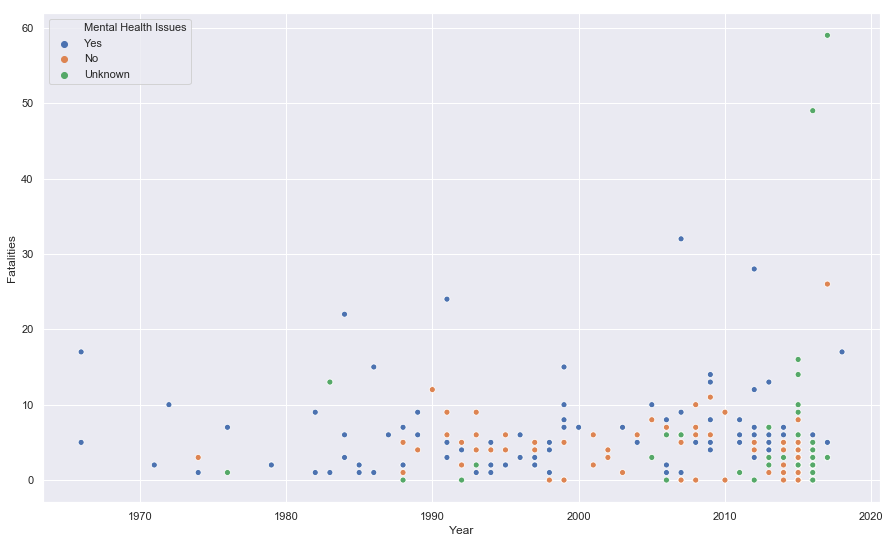

In [35]:
plt.figure(figsize=(15,9))
ax = sns.scatterplot(x="Year", y="Fatalities", hue="Mental Health Issues", data=temp_Mental_Health)

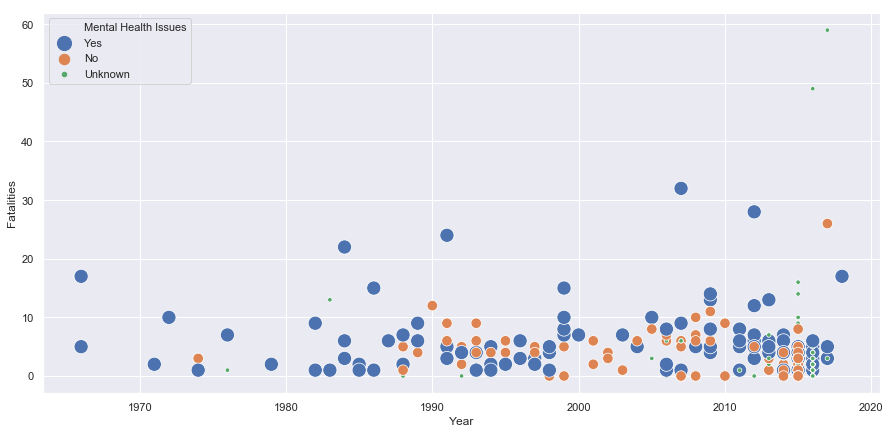

In [36]:
cmap = sns.cubehelix_palette(dark=.2, light=.9, as_cmap=True)
plt.figure(figsize=(15,7))
ax = sns.scatterplot(x="Year", y="Fatalities",
                         hue="Mental Health Issues", size="Mental Health Issues",
                         sizes=(20, 200), hue_norm=(0, 9),
                         legend="full", data=ms_df)

In [37]:
#Statistics for Fatalities
ms_df['Fatalities'].sum(), # Total sum of the column values
ms_df['Fatalities'].mean(), # Mean of the column values
ms_df['Fatalities'].median(), # Median of the column values
ms_df['Fatalities'].nunique(), # Number of unique entries
ms_df['Fatalities'].max(), # Maximum of the column values
ms_df['Fatalities'].min() # Minimum of the column values
print (ms_df['Fatalities'].sum()), 
print (ms_df['Fatalities'].mean()), 
print (ms_df['Fatalities'].median()), 
print (ms_df['Fatalities'].nunique()), 
print (ms_df['Fatalities'].max()), 
print (ms_df['Fatalities'].min())

1450
4.4753086419753085
3.0
25
59
0


In [38]:
#Statistics for Total victims
ms_df['Total victims'].sum(), # Total sum of the column values
ms_df['Total victims'].mean(), # Mean of the column values
ms_df['Total victims'].median(), # Median of the column values
ms_df['Total victims'].nunique(), # Number of unique entries
ms_df['Total victims'].max(), # Maximum of the column values
ms_df['Total victims'].min() # Minimum of the column values
print (ms_df['Total victims'].sum()), 
print (ms_df['Total victims'].mean()), 
print (ms_df['Total victims'].median()), 
print (ms_df['Total victims'].nunique()), 
print (ms_df['Total victims'].max()), 
print (ms_df['Total victims'].min())

3349
10.33641975308642
5.0
36
585
3


In [39]:
temp_Mental_Health2 = ms_df[['Year', 'Fatalities', 'Injured', 'Total victims', 'Mental Health Issues','Race']]
temp_Mental_Health2.head(5)

,Year,Fatalities,Injured,Total victims,Mental Health Issues,Race
0,2018,17,17,34,Yes,White
1,2017,26,20,46,No,White
2,2017,3,0,3,No,White
3,2017,3,3,6,No,Black
4,2017,59,527,585,Unknown,White


In [40]:
temp_Mental_Health2["Race"].value_counts()

White American or European American                    122
Black American or African American                      76
Unknown                                                 42
Some other race                                         20
white                                                   12
Asian American                                          11
White                                                   10
Asian                                                    6
Latino                                                   5
Black                                                    5
Native American or Alaska Native                         3
black                                                    3
Other                                                    2
Two or more races                                        2
Black American or African American/Unknown               1
Asian American/Some other race                           1
White American or European American/Some other Race     

In [41]:
list_ = ["Unknown", "Some other race", "Two or more races",
    "Other"]

temp_Mental_Health2["Race"] = ['Other' if i in list_ else i for i in temp_Mental_Health2["Race"]]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [42]:
temp_Mental_Health2["Race"].value_counts()

White American or European American                    122
Black American or African American                      76
Other                                                   66
white                                                   12
Asian American                                          11
White                                                   10
Asian                                                    6
Black                                                    5
Latino                                                   5
Native American or Alaska Native                         3
black                                                    3
Black American or African American/Unknown               1
Asian American/Some other race                           1
White American or European American/Some other Race      1
Name: Race, dtype: int64

In [43]:
list_ = ["White American or European American", "white", "White American or Eurpean American/Some other Race",
    "Other"]

temp_Mental_Health2["Race"] = ['White' if i in list_ else i for i in temp_Mental_Health2["Race"]]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [44]:
list_ = ["Black American or African American", "Black", "black", 'Black American or African American/Unknown']

temp_Mental_Health2["Race"] = ['Black' if i in list_ else i for i in temp_Mental_Health2["Race"]]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
list_ = ["Asian American", "Asian", "black", 'Asian American/Some other race']

temp_Mental_Health2["Race"] = ['Asian' if i in list_ else i for i in temp_Mental_Health2["Race"]]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
temp_Mental_Health2["Race"].value_counts()

White                                                  210
Black                                                   85
Asian                                                   18
Latino                                                   5
Native American or Alaska Native                         3
White American or European American/Some other Race      1
Name: Race, dtype: int64

In [47]:
list_ = ["White American or European American/Some other Race"]

temp_Mental_Health2["Race"] = ['White' if i in list_ else i for i in temp_Mental_Health2["Race"]]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
list_ = ["Native American or Alaska Native"]

temp_Mental_Health2["Race"] = ['Native American' if i in list_ else i for i in temp_Mental_Health2["Race"]]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
temp_Mental_Health2["Race"].value_counts()

White              211
Black               85
Asian               18
Latino               5
Native American      3
Name: Race, dtype: int64

In [50]:
temp_Mental_Health2["Race"].describe()

count       322
unique        5
top       White
freq        211
Name: Race, dtype: object

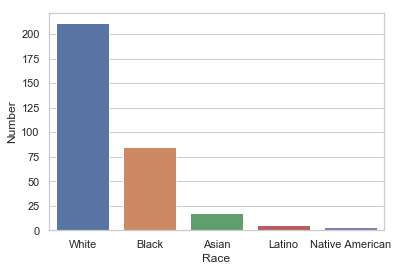

In [51]:
race_df = pd.read_csv('/Users/manueltanguma/Downloads/Mass Shootings Race2.csv', encoding='latin-1')
sns.set(style="whitegrid")
ax = sns.barplot(x="Race", y="Number", data=race_df)

In [52]:
temp_Mental_Health2.head(5)

,Year,Fatalities,Injured,Total victims,Mental Health Issues,Race
0,2018,17,17,34,Yes,White
1,2017,26,20,46,No,White
2,2017,3,0,3,No,White
3,2017,3,3,6,No,Black
4,2017,59,527,585,Unknown,White


In [53]:
temp_Mental_Health2.groupby(by=temp_Mental_Health2['Year'])

In [54]:
temp_Mental_Health2.head(10)

,Year,Fatalities,Injured,Total victims,Mental Health Issues,Race
0,2018,17,17,34,Yes,White
1,2017,26,20,46,No,White
2,2017,3,0,3,No,White
3,2017,3,3,6,No,Black
4,2017,59,527,585,Unknown,White
5,2017,3,2,5,Yes,Asian
6,2017,3,0,3,Unknown,White
7,2017,5,0,5,Unknown,NaN
8,2017,3,0,3,Yes,White
9,2017,3,0,3,Unknown,Black


In [55]:
temp_Mental_Health2["Mental Health Issues"].value_counts()

Unknown    124
Yes        107
No          93
Name: Mental Health Issues, dtype: int64

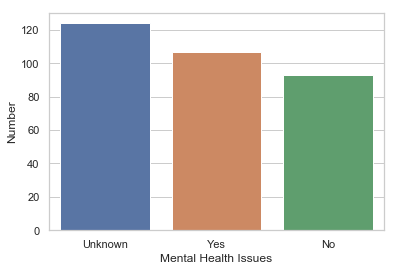

In [56]:
mental_df = pd.read_csv('/Users/manueltanguma/Downloads/Mental Health Issues Shootings.csv', encoding='latin-1')
sns.set(style="whitegrid")
ax = sns.barplot(x="Mental Health Issues", y="Number", data=mental_df)

<Figure size 432x288 with 0 Axes>

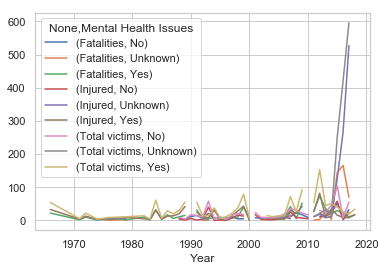

<Figure size 1224x540 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [57]:
#plt.figure(figsize=(17,17.5))
#plt.figure()
temp_Mental_Health2.groupby(['Year','Mental Health Issues']).sum().unstack().plot()
plt.figure(figsize=(17,7.5))
plt.figure()

In [58]:
heatmap_df = ms_df[['Month', 'Year', 'Fatalities', 'Injured', 'Total victims']]
heatmap_df.head(5)

,Month,Year,Fatalities,Injured,Total victims
0,2,2018,17,17,34
1,11,2017,26,20,46
2,11,2017,3,0,3
3,10,2017,3,3,6
4,10,2017,59,527,585


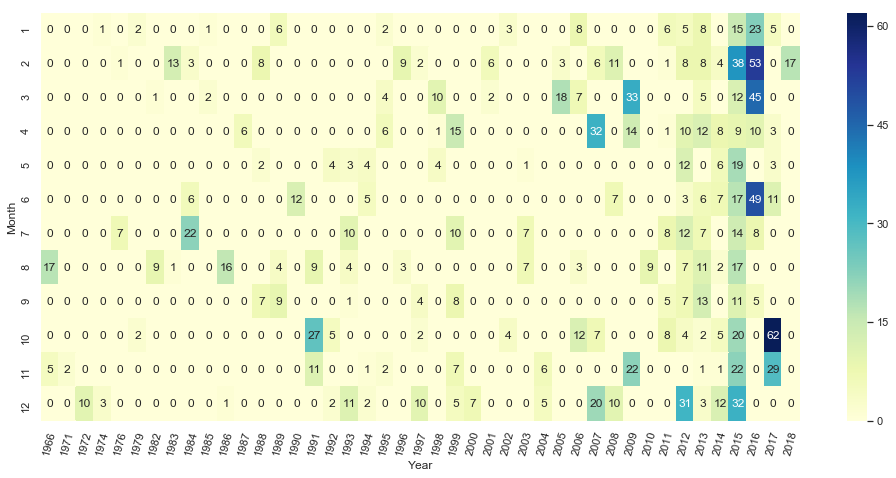

In [59]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

ms_df = pd.read_csv('/Users/manueltanguma/Downloads/Mass Shootings Dataset Ver 5 (1) including Parkland.csv', encoding='latin-1')
ms_df['Year'] = pd.DatetimeIndex(ms_df['Date']).year
ms_df['Month'] = pd.DatetimeIndex(ms_df['Date']).month
temp_df=ms_df[["Month", "Year", "Fatalities"]]
#os.chdir("C:/Users/Andyh/Downloads")
#df = pd.read_csv('Temp_df.csv')
temp__df = temp_df.dropna()
#df['Year'] = pd.DatetimeIndex(df['Date']).year
#df['Month'] = pd.DatetimeIndex(df['Date']).month
#del temp_df['Date']
temp_df = temp_df[['Year','Month','Fatalities']]
a = temp_df.pivot_table(index='Month',columns='Year',values='Fatalities',aggfunc='sum').fillna(0).astype('int64')

plt.figure(figsize=(17,7.5))
sns.heatmap(a,cmap="YlGnBu", annot=True, fmt="d")
plt.xticks(rotation=75) 
plt.savefig('MS heatmap.png',dpi=1800)
plt.show()

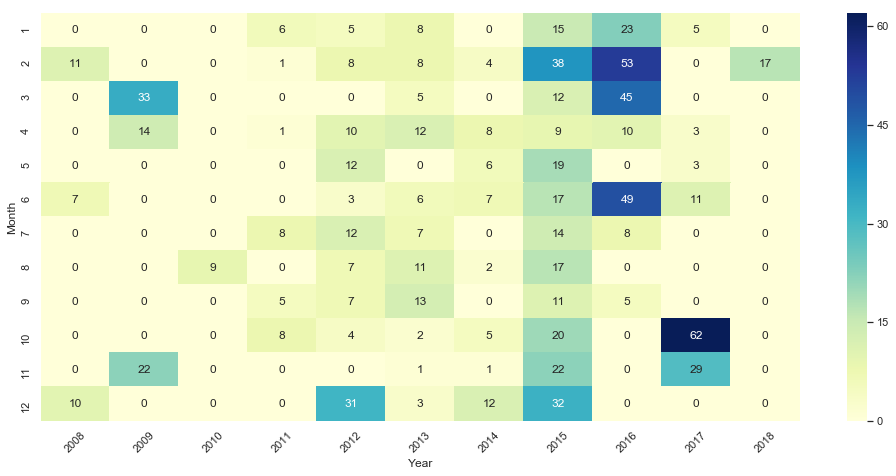

In [60]:
#Heatmap for the last 10 years vs the last 50 above
last10_df = pd.read_csv('/Users/manueltanguma/Downloads/Mass Shootings Dataset Last 10 Years.csv', encoding='latin-1')
last10_df['Year'] = pd.DatetimeIndex(last10_df['Date']).year
last10_df['Month'] = pd.DatetimeIndex(last10_df['Date']).month
temp_df1=last10_df[["Month", "Year", "Fatalities"]]
temp__df1 = temp_df1.dropna()
temp_df1 = temp_df1[['Year','Month','Fatalities']]
a = temp_df1.pivot_table(index='Month',columns='Year',values='Fatalities',aggfunc='sum').fillna(0).astype('int64')

plt.figure(figsize=(17,7.5))
sns.heatmap(a,cmap="YlGnBu", annot=True, fmt="d")
plt.xticks(rotation=45) 
plt.savefig('MS heatmap.png',dpi=1800)
plt.show()

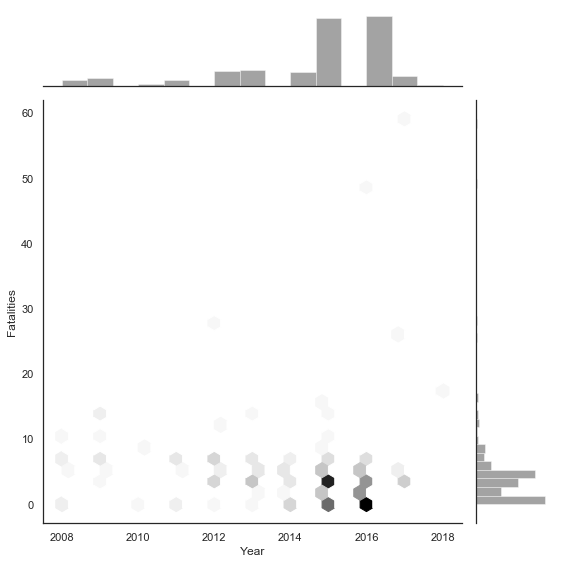

In [61]:
#Hexbin plot for last 10 years
with sns.axes_style("white"):
    sns.jointplot(x="Year", y="Fatalities", data=temp_df1, height=8, kind="hex", color="k");

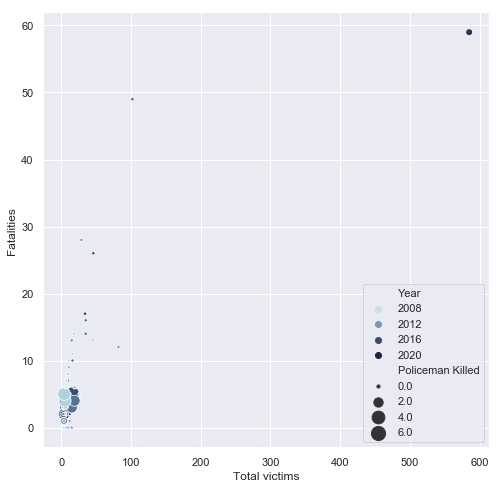

In [62]:

sns.set()


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="Total victims", y="Fatalities",
                     hue="Year", size="Policeman Killed",
                     palette=cmap, sizes=(10, 200),
                     data=last10_df)


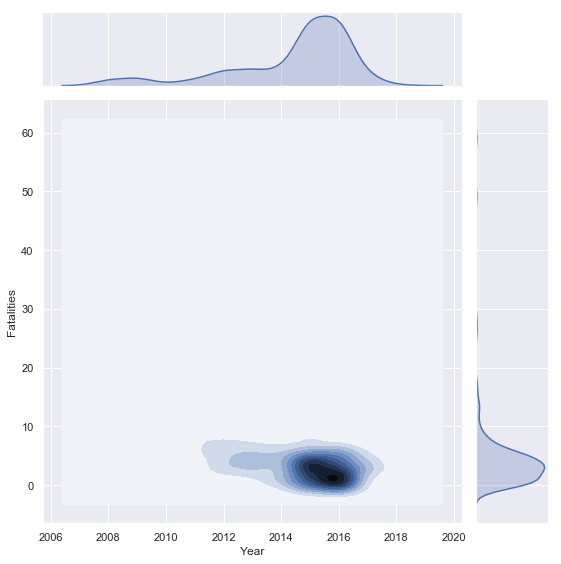

In [63]:
#KDE plot last 10 years
sns.jointplot(x="Year", y="Fatalities", data=last10_df, height=8, kind="kde")

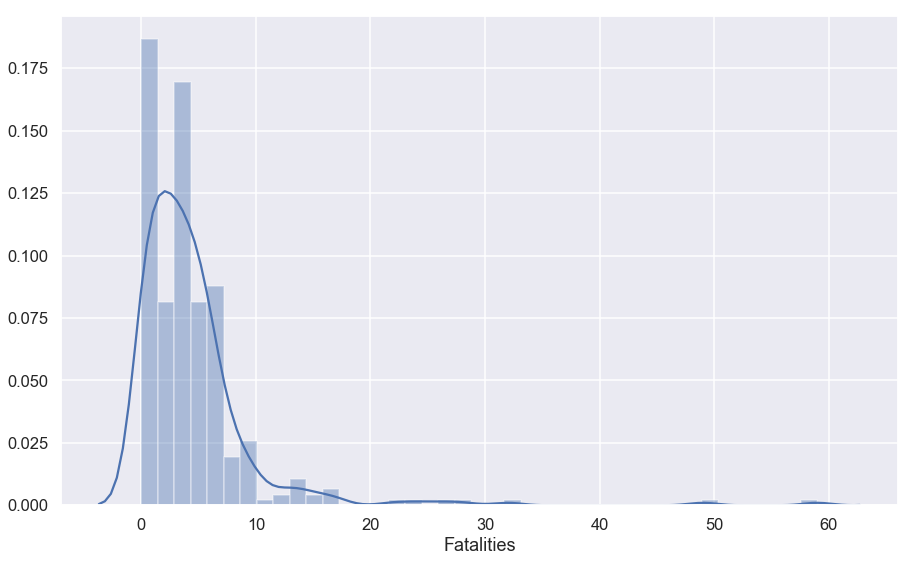

In [64]:
#distribution plot 
plt.figure(figsize=(15,9))
sns.set_context("talk")
sns.distplot(ms_df['Fatalities'])

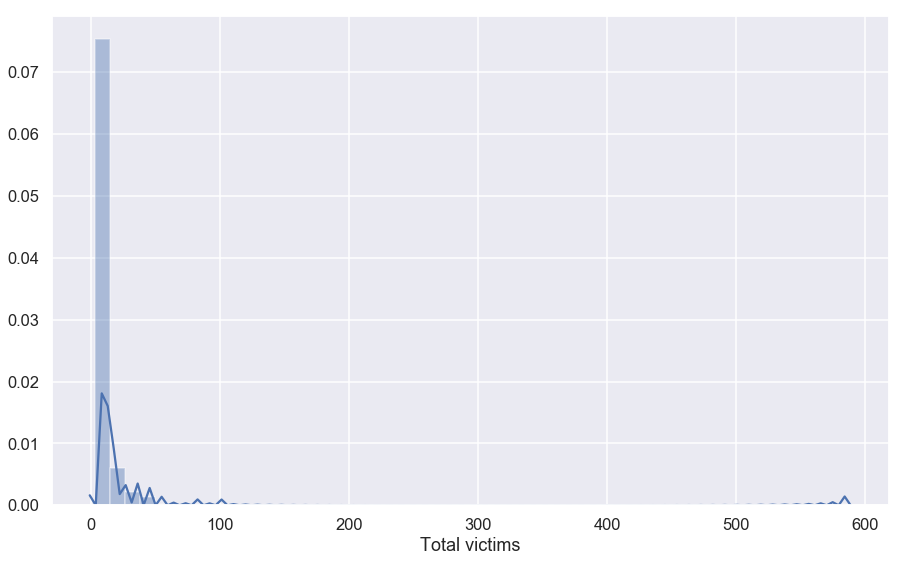

In [65]:
#distribution plot 
plt.figure(figsize=(15,9))
sns.set_context("talk")
sns.distplot(ms_df['Total victims'])

In [66]:
print(ms_df['Fatalities'].mean())
print(ms_df['Total victims'].mean())
print(ms_df['Fatalities'].std())
print(ms_df['Total victims'].std())
#compute the t-statistic and p-value
from scipy.stats import ttest_ind
print(ttest_ind(ms_df['Fatalities'], ms_df['Total victims'], equal_var=False))

4.4753086419753085
10.33641975308642
5.816279722603264
33.6360197911379
Ttest_indResult(statistic=-3.0906525415920627, pvalue=0.0021609241519456729)


In [67]:
ms_df["Employeed (Y/N)"].value_counts()

1.0    43
0.0    25
Name: Employeed (Y/N), dtype: int64

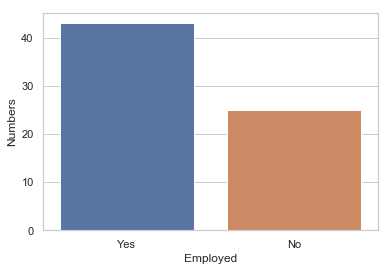

In [68]:
employed_df = pd.read_csv('/Users/manueltanguma/Downloads/Employed.csv', encoding='latin-1')
sns.set(style="whitegrid")
#ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax = sns.barplot(x="Employed", y="Numbers", data=employed_df)

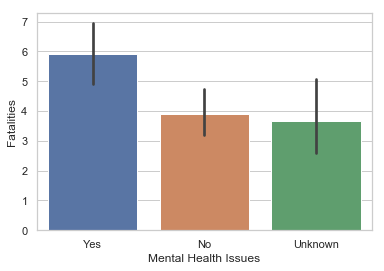

In [69]:
sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.barplot(x="Mental Health Issues", y="Fatalities", data=temp_Mental_Health2)


In [70]:
ms_df['Fatalities'].sum(), # Total sum of the column values
ms_df['Fatalities'].mean(), # Mean of the column values
ms_df['Fatalities'].median(), # Median of the column values
ms_df['Fatalities'].nunique(), # Number of unique entries
ms_df['Fatalities'].max(), # Maximum of the column values
ms_df['Fatalities'].min() # Minimum of the column values
print (ms_df['Fatalities'].sum()), 
print (ms_df['Fatalities'].mean()), 
print (ms_df['Fatalities'].median()), 
print (ms_df['Fatalities'].nunique()), 
print (ms_df['Fatalities'].max()), 
print (ms_df['Fatalities'].min())

1450
4.4753086419753085
3.0
25
59
0


In [71]:
ms_df['Total victims'].sum(), # Total sum of the column values
ms_df['Total victims'].mean(), # Mean of the column values
ms_df['Total victims'].median(), # Median of the column values
ms_df['Total victims'].nunique(), # Number of unique entries
ms_df['Total victims'].max(), # Maximum of the column values
ms_df['Total victims'].min() # Minimum of the column values
print (ms_df['Total victims'].sum()), 
print (ms_df['Total victims'].mean()), 
print (ms_df['Total victims'].median()), 
print (ms_df['Total victims'].nunique()), 
print (ms_df['Total victims'].max()), 
print (ms_df['Total victims'].min())

3349
10.33641975308642
5.0
36
585
3


In [72]:
temp_mapdf = ms_df[['Year', 'Fatalities', 'Latitude', 'Longitude']]
temp_mapdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 4 columns):
Year          324 non-null int64
Fatalities    324 non-null int64
Latitude      303 non-null float64
Longitude     303 non-null float64
dtypes: float64(2), int64(2)
memory usage: 10.2 KB


In [73]:
temp_onlymapdf = ms_df[['Latitude', 'Longitude']]
temp_onlymapdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
Latitude     303 non-null float64
Longitude    303 non-null float64
dtypes: float64(2)
memory usage: 5.1 KB


In [74]:
temp_onlymapdf.head(10)

,Latitude,Longitude
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,36.181271,-115.134132
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [75]:
temp_onlymapdf.dropna(inplace=True)
temp_onlymapdf.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Latitude,Longitude
4,36.181271,-115.134132
15,38.744217,-90.305391
16,38.845113,-76.874972
17,36.765971,-78.928344
18,39.290385,-76.612189
19,41.878114,-87.629798
20,29.785785,-95.824396
21,34.162040,-86.475543
22,33.770050,-118.193739
23,35.085334,-106.605553


In [76]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


SystemError: <class 'RuntimeError'> returned a result with an error set

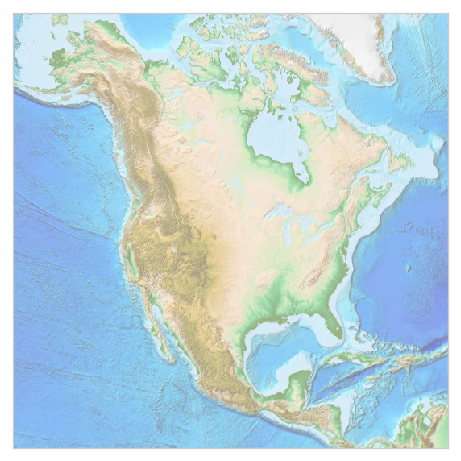

In [77]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(temp_onlymapdf['Longitude'], temp_onlymapdf['Latitude'])
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Shooting', fontsize=10);

In [78]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt


In [79]:
temp_onlymapdf['Coordinates'] = list(zip(temp_onlymapdf.Longitude, temp_onlymapdf.Latitude))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
temp_onlymapdf['Coordinates'] = temp_onlymapdf['Coordinates'].apply(Point)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
temp_onlymapdf.head(10)

,Latitude,Longitude,Coordinates
4,36.181271,-115.134132,POINT (-115.134132 36.181271)
15,38.744217,-90.305391,POINT (-90.305391 38.744217)
16,38.845113,-76.874972,POINT (-76.874972 38.845113)
17,36.765971,-78.928344,POINT (-78.928344 36.765971)
18,39.290385,-76.612189,POINT (-76.612189 39.290385)
19,41.878114,-87.629798,POINT (-87.62979799999999 41.878114)
20,29.785785,-95.824396,POINT (-95.82439599999999 29.785785)
21,34.162040,-86.475543,POINT (-86.475543 34.16204)
22,33.770050,-118.193739,POINT (-118.193739 33.77005)
23,35.085334,-106.605553,POINT (-106.605553 35.085334)


In [82]:
gdf = geopandas.GeoDataFrame(temp_onlymapdf, geometry='Coordinates')

In [83]:
from matplotlib.collections import PatchCollection

ImportError: The descartes package is required for plotting polygons in geopandas.

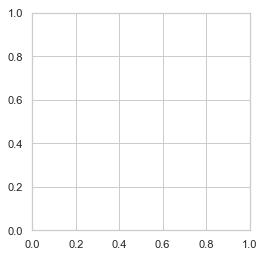

In [84]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

In [85]:
temp_onlymapdf.to_csv("LatandLong.csv")

In [86]:
import matplotlib.pyplot as plt
import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize


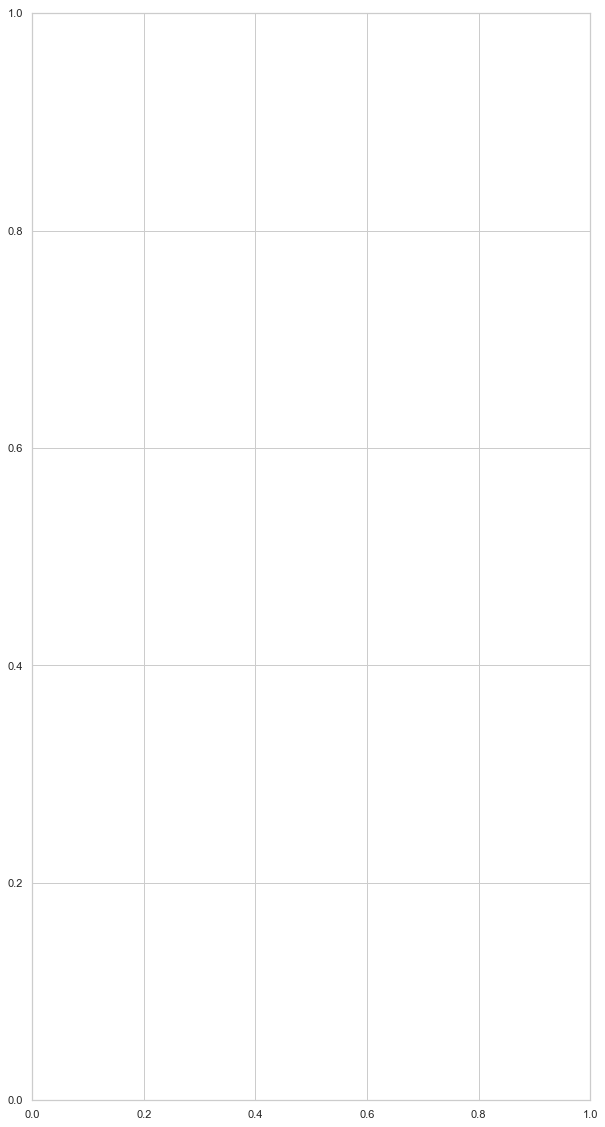

In [87]:
fig, ax = plt.subplots(figsize=(10,20))

In [88]:

m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-6., llcrnrlat= 49.5, urcrnrlon=2., urcrnrlat=55.2)


/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


AttributeError: 'AxesSubplot' object has no attribute 'get_axis_bgcolor'

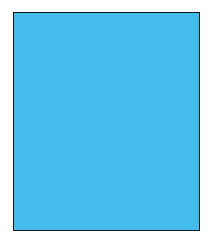

In [89]:

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
